<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Flatten,Conv2D,Dense,Dropout,MaxPool2D

In [4]:
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [6]:
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
x_train.max()

255

In [9]:
x_train=x_train/255.0
x_test=x_test/255.0

In [11]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

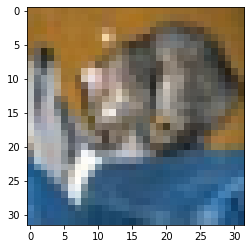

In [13]:
plt.imshow(x_test[0])

In [14]:
model=Sequential()


In [15]:
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[32,32,3]))


model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))


In [16]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [20]:
history=model.fit(x_train,y_train,batch_size=100,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
116/500 [=====>........................] - ETA: 1:46 - loss: 1.9458 - sparse_categorical_accuracy: 0.2876

KeyboardInterrupt: ignored